In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import style
import numpy as np
style.use('fivethirtyeight')
%matplotlib inline

In [3]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [15]:
data = pd.read_csv(r'C:\Users\GARY MASINGA\Desktop\New folder\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [16]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
data.shape

(1470, 35)

In [127]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# we have 0 NaN values.

# 1. View the age distribution of the employees

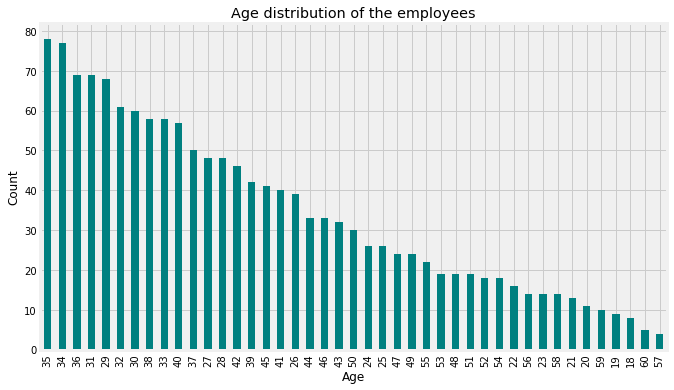

In [22]:
data.Age.value_counts().plot.bar(figsize=(10,6), color = 'teal')
plt.title('Age distribution of the employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# explore data for Attrition by Age

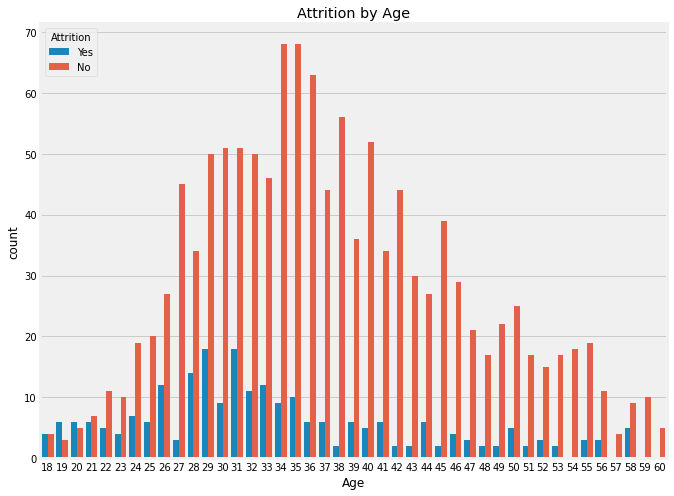

In [57]:
plt.figure(figsize = (10,8))
sns.countplot(x = data.Age, hue = data.Attrition)
plt.title('Attrition by Age')
plt.show()

# explore data for Left employees breakdown

In [90]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

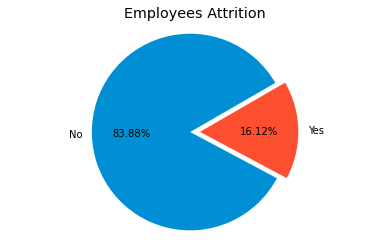

In [95]:
plt.pie(data.Attrition.value_counts(), labels = ('No','Yes'), startangle=30,autopct = '%1.2f%%', explode = (0.1,0))
plt.axis('equal')
plt.title('Employees Attrition')
plt.show()

# Explore data for Education Field distribution

In [96]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

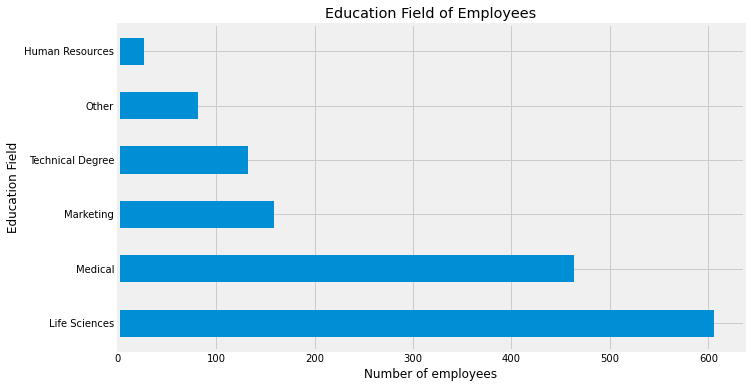

In [98]:
data.EducationField.value_counts().plot.barh(figsize=(10,6))
plt.xlabel('Number of employees')
plt.ylabel('Education Field')
plt.title('Education Field of Employees')
plt.show()

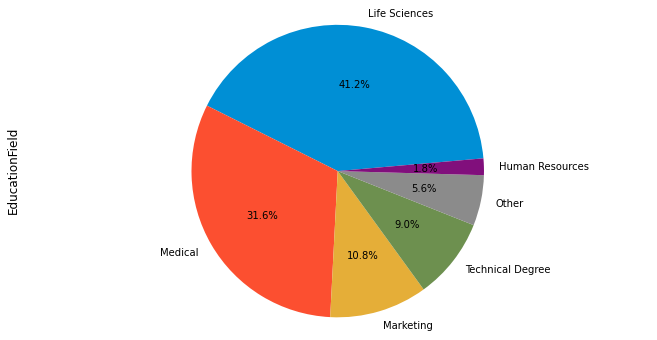

In [124]:
data.EducationField.value_counts().plot.pie(figsize=(10,6), startangle = 5, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# explore data for Marital Status

In [113]:
data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

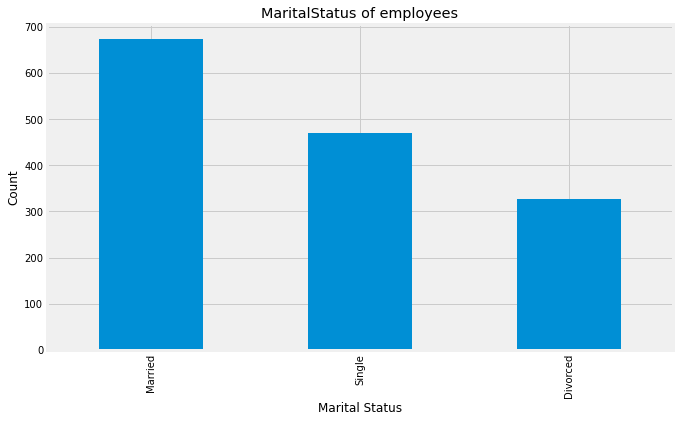

In [312]:
data.MaritalStatus.value_counts().plot.bar(figsize=(10,6))
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('MaritalStatus of employees')
plt.show()

# Build a model to predict which employees are likely to attrite

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# we have 9 categorical features
# I'm going to change those categorical features to numeric but first let me extract the independent and dependent variables.

In [281]:
# Independent variables

x = data.drop('Attrition', axis = 1)

# Dependent variable

y = data.Attrition

In [157]:
print(x.shape)
print(y.shape)

(1470, 34)
(1470,)


In [282]:
# changing those categorical features to numeric

x = pd.get_dummies(x, drop_first=True)
y = pd.get_dummies(y, drop_first=True)
y = np.ravel(y)

In [159]:
print(x.shape)

(1470, 47)


In [283]:
# If you want you can include all the features in your model but you can also select the most important features using your own technique
# I'm going to use Univariate technique to select the best features

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

best = SelectKBest(score_func = chi2, k = 'all')
fit = best.fit(x, y)

scores = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x.columns)

featurescores = pd.concat([features, scores], axis = 1)
featurescores.columns = ['Feature','Score']

print(featurescores.nlargest(45, 'Score'))

                              Feature          Score
11                      MonthlyIncome  127922.293694
12                        MonthlyRate    1196.633553
1                           DailyRate     956.580494
19                  TotalWorkingYears     230.721618
22                     YearsAtCompany     142.100054
23                 YearsInCurrentRole     117.522596
25               YearsWithCurrManager     110.671534
0                                 Age      84.155277
46                       OverTime_Yes      63.845067
2                    DistanceFromHome      63.772142
5                      EmployeeNumber      58.120326
43       JobRole_Sales Representative      34.290268
45               MaritalStatus_Single      30.771669
18                   StockOptionLevel      25.268826
9                            JobLevel      24.939242
26   BusinessTravel_Travel_Frequently      15.816623
37      JobRole_Laboratory Technician      11.699495
40          JobRole_Research Director      10.

In [284]:
# A higher score means that the feature is more important to the dependent variable so you can select based on your discretion.
# I'm going to include all excluding Education,Gender,HourlyRate,
# PercentSalaryHike,PerformanceRating,StandardHours and EmployeeCount column since they hve the lowest scores scored lesser.

x = x.drop(['Education','Gender_Male','HourlyRate','PercentSalaryHike','PerformanceRating','StandardHours','EmployeeCount'],axis = 1)

In [286]:
# splitting into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 100)
model.fit(x_train, y_train)

predicted = model.predict(x_test)

In [287]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy: '+str(accuracy_score(y_test, predicted)*100))
print()
print(confusion_matrix(y_test, predicted))

Accuracy: 86.41304347826086

[[294  18]
 [ 32  24]]


In [288]:
# creating a RandomForest classification model

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs = 2, random_state = 0)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)


In [289]:
accuracy_score(y_test, y_pred)

0.8668478260869565

In [290]:
# creating a decision tree classification model

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5, random_state = 100)
tree.fit(x_train, y_train)

pred = tree.predict(x_test)

In [291]:
print('Accuracy score: '+str(accuracy_score(y_test,pred)*100))

Accuracy score: 83.96739130434783


In [ ]:
#Of these three models, Random Forest is the best